<a href="https://colab.research.google.com/github/Dpjaiswal/Clustering-with-K-Means/blob/main/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


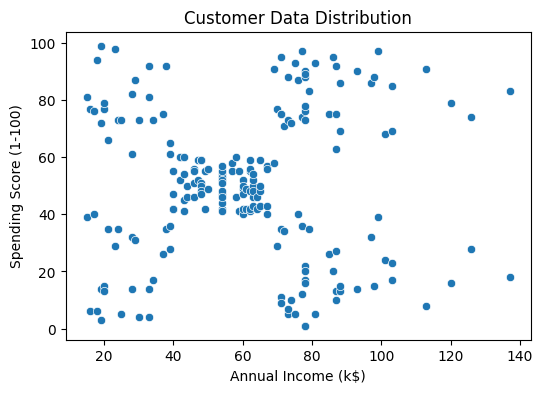

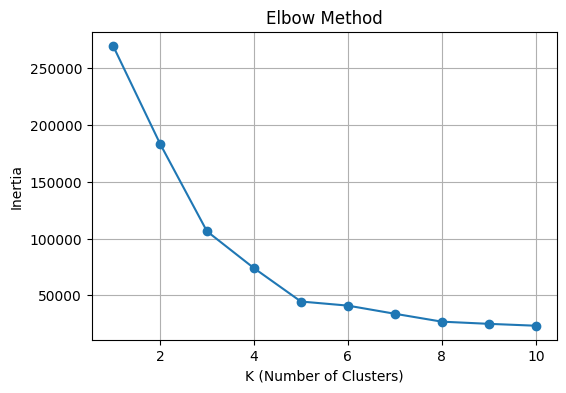

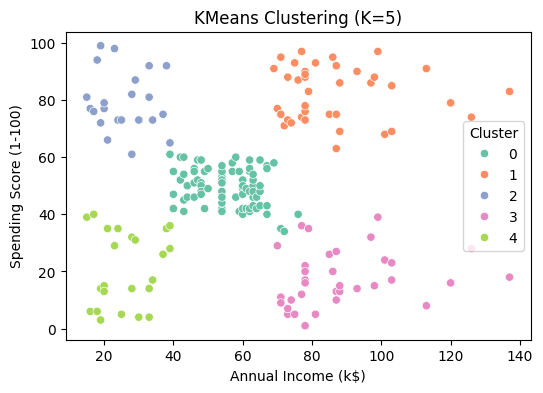

Silhouette Score for K=5: 0.55


In [2]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Upload dataset
from google.colab import files  # Skip if not using Colab


# Load the CSV (replace filename accordingly if not 'Mall_Customers.csv')
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

# Step 3: Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 4: Visualize original data
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Customer Data Distribution')
plt.show()

# Step 5: Elbow Method to find optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('K (Number of Clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Step 6: Fit KMeans model with optimal K
optimal_k = 5  # Change based on Elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

# Step 7: Visualize Clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2')
plt.title(f'KMeans Clustering (K={optimal_k})')
plt.show()

# Step 8: Silhouette Score
score = silhouette_score(X, clusters)
print(f'Silhouette Score for K={optimal_k}: {score:.2f}')
